1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

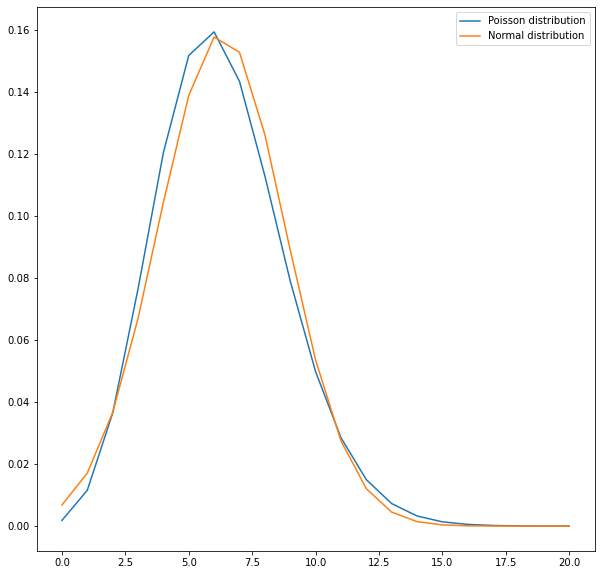

In [2]:
x = np.linspace(0,20,21) # grid for plotting
mu = 6.3
y = poisson.pmf(x, mu) 
z = norm.pdf(x, mu, np.sqrt(mu)) # approx poisson to normal distribution
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x, y, label = "Poisson distribution")
ax.plot(x, z, label = "Normal distribution")
ax.legend()

In [3]:
print("p value:", f"{100*(1-poisson.cdf(15, mu)):.2f} %", "(single tail)") 
# 0.08 < 5, reject the null hypothesis of poisson distribution with mu = 6.3

p value: 0.08 % (single tail)


In [4]:
Z = (15-mu)/(np.sqrt(mu)) 
print("Z = %.2f" % (Z))
# Z > 3 reject the null hypothesis of normal distribution with mu = 6.3 and sigma = sqrt(6.3)

Z = 3.47


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.99


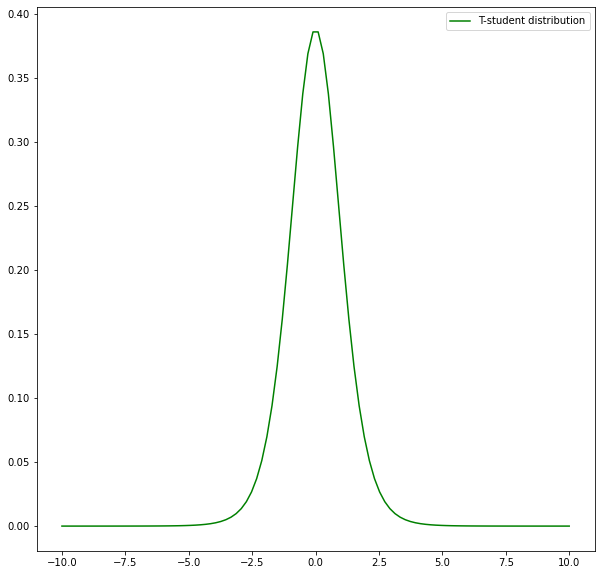

In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
N = len(pre)
sigma_pre = np.std(pre)
sigma_post = np.std(post)
sigma = np.sqrt(sigma_pre**2 + sigma_post**2)
T = abs(np.mean(post) - np.mean(pre))/(sigma/np.sqrt(N))
print(f"T = {T:.2f}")

x = np.linspace(-10,10,100)
y = t.pdf(x, N-1)
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x, y, color = "green", label = "T-student distribution")
ax.legend()

In [6]:
print("p value:", f"{2*100*(1-t.cdf(T, N-1)):.2f} %", "(double tail)") 
# 0.31 < 5, reject the null hypothesis that was "change is not significant"

p value: 0.31 % (double tail)


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

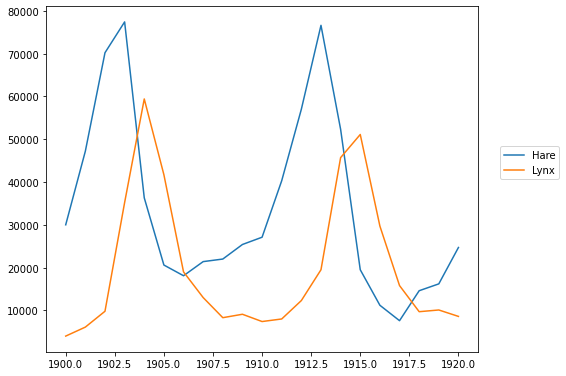

In [7]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables

plt.figure(figsize=(12,6))
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

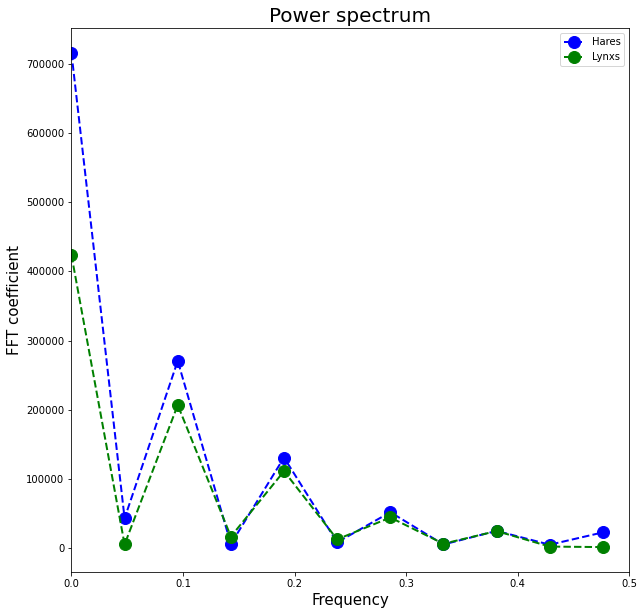

In [8]:
from scipy import fftpack

ft_hares = fftpack.fft(hares)
frequencies_hares = fftpack.fftfreq(hares.size, d=year[1]-year[0])
frequencies_hares = frequencies_hares[:11]
ft_hares = ft_hares[:11]

ft_lynx = fftpack.fft(lynxes)
frequencies_lynx = fftpack.fftfreq(lynxes.size, d=year[1]-year[0])
frequencies_lynx = frequencies_lynx[:11]
ft_lynx = ft_lynx[:11]

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(frequencies_hares, np.abs(ft_hares),'bo--', linewidth=2, markersize=12, label = "Hares") 
ax.plot(frequencies_lynx, np.abs(ft_lynx),'go--', linewidth=2, markersize=12, label = "Lynxs") 
ax.set_xlim(0,0.5)
ax.set_xlabel("Frequency", fontsize=15)
ax.set_ylabel("FFT coefficient", fontsize=15)
ax.set_title("Power spectrum", fontsize=20)
ax.legend()

In [9]:
period_hares = 1/frequencies_hares[2]
period_lynx = 1/frequencies_lynx[2]
print("The period for the hares is:", period_hares)
print("The period for the lynxes is:", period_lynx)

The period for the hares is: 10.5
The period for the lynxes is: 10.5


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

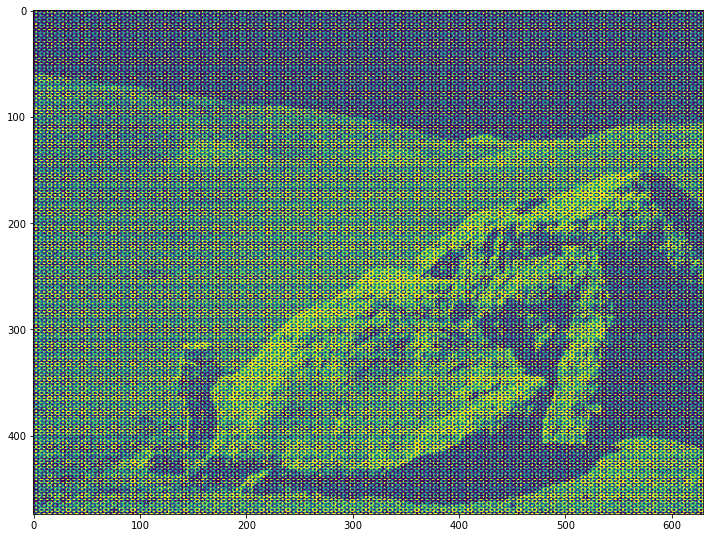

In [10]:
image = plt.imread("moonlanding.png")
plt.figure(figsize = (12,10))
plt.imshow(image)

In [11]:
spectrum = fftpack.fft2(image)
print(spectrum.shape)

(474, 630)


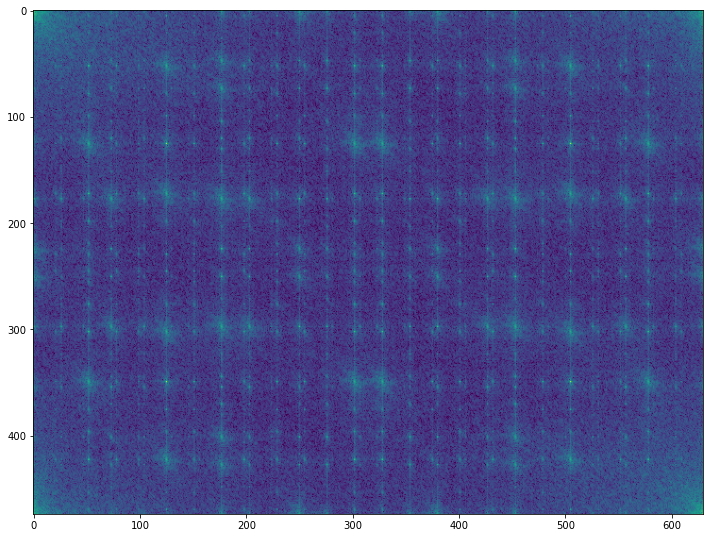

In [12]:
from matplotlib.colors import LogNorm
plt.figure(figsize = (12,10))
plt.imshow(abs(spectrum), norm=LogNorm(vmin=5))

Text(0.5, 1.0, 'Filtered Spectrum')

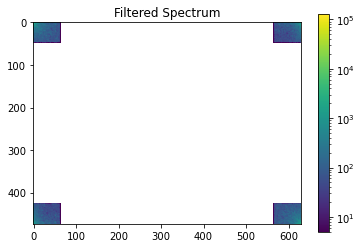

In [13]:
def plot_spectrum(im_fft): # plot with a colormap
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

keep_fraction = 0.1
r, c = spectrum.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):

spectrum[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
spectrum[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(spectrum)
plt.title('Filtered Spectrum')

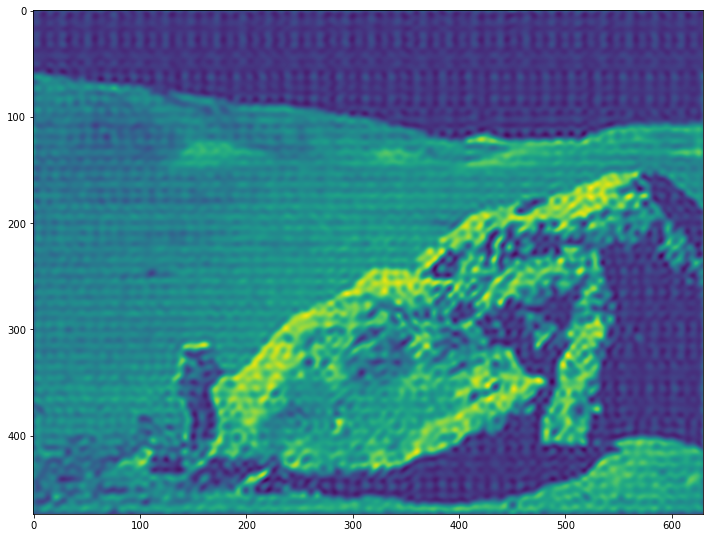

In [14]:
image_f = fftpack.ifft2(spectrum) # filtered image
plt.figure(figsize = (12,10))
plt.imshow(abs(image_f))